In [1]:
import pickle
import pandas as pd
import math
import os
import numpy as np
from itertools import product
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.python.ops.variables import Variable
from tensorflow.contrib.layers import flatten

import helpers as h

#---------------------------------------------
# Training parameters
#---------------------------------------------
training_file = 'data/train.p'
testing_file = 'data/test.p'
features_count = 32 * 32
batch_size=100
epochs = 2000
learning_rate = 0.0001
early_stopping_rounds = 10
dropout_probability = 0.2
TRAIN_DIR = 'logs/'

#---------------------------------------------
# Load data
#---------------------------------------------
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train.shape[1]
n_classes = len(set(y_train))

In [2]:
X_train.shape

(39209, 32, 32, 3)

<module 'matplotlib.pyplot' from '/home/mattwg/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

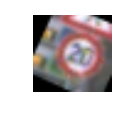

In [3]:
#---------------------------------------------
# Balance classes - 5000 of each image
#---------------------------------------------
%matplotlib inline
img = X_train[1,:,:, :]

h.plot_image(h.random_rotate(img), 1, 1)

In [12]:
## Generate 2500 of each class
## for each class
X_train_balanced = np.empty([2500*43, 32, 32, 3])
y_train_balanced = np.empty([2500*43])
indices = np.arange(0,len(X_train))
start_idx = 0
for c in range(0,n_classes):
    bidx = (y_train == c)
    class_indices = indices[bidx]
    n_imgs = len(class_indices)
    n_new_imgs = 2500 - n_imgs
    end_idx = start_idx + n_imgs
    print(c, n_imgs, n_new_imgs, start_idx, end_idx, end_idx + n_new_imgs)
    # copy old images over
    X_train_balanced[start_idx:end_idx,:,:,:] = X_train[class_indices,:,:,:]
    y_train_balanced[start_idx:end_idx] = y_train[class_indices]
    # sample remaining images
    new_idx = np.random.choice(class_indices,n_new_imgs)
    for i, j in enumerate(new_idx):
        X_train_balanced[end_idx+i,:,:,:] = h.random_rotate(X_train[j,:,:,:])
        y_train_balanced[end_idx+i] = y_train[j
                                                   ]
    start_idx = start_idx + 2500
                                                                
                                                                
X_train_balanced.shape


for c in range(0,n_classes):
    print(len(y_train_balanced[(y_train_balanced == c)]))
    

0 210 2290 0 210 2500
1 2220 280 2500 4720 5000
2 2250 250 5000 7250 7500
3 1410 1090 7500 8910 10000
4 1980 520 10000 11980 12500
5 1860 640 12500 14360 15000
6 420 2080 15000 15420 17500
7 1440 1060 17500 18940 20000
8 1410 1090 20000 21410 22500
9 1470 1030 22500 23970 25000
10 2010 490 25000 27010 27500
11 1320 1180 27500 28820 30000
12 2100 400 30000 32100 32500
13 2160 340 32500 34660 35000
14 780 1720 35000 35780 37500
15 630 1870 37500 38130 40000
16 420 2080 40000 40420 42500
17 1110 1390 42500 43610 45000
18 1200 1300 45000 46200 47500
19 210 2290 47500 47710 50000
20 360 2140 50000 50360 52500
21 330 2170 52500 52830 55000
22 390 2110 55000 55390 57500
23 510 1990 57500 58010 60000
24 270 2230 60000 60270 62500
25 1500 1000 62500 64000 65000
26 600 1900 65000 65600 67500
27 240 2260 67500 67740 70000
28 540 1960 70000 70540 72500
29 270 2230 72500 72770 75000
30 450 2050 75000 75450 77500
31 780 1720 77500 78280 80000
32 240 2260 80000 80240 82500
33 689 1811 82500 83189 850